In [2]:
import pandas as pd
import matplotlib.pyplot as plt

input_file = 'notas_alunos.xlsx' 
output_file = 'resultado_final.xlsx'
df = pd.read_excel(input_file)

df

,Número de matrícula,Aluno,Prova 1,Prova 2,Prova 3
0,1,Carlos Moraes,9.90,5.46,4.98
1,2,Kleber Ferreira,2.17,7.87,8.75
2,3,Eduardo Castro,6.63,6.42,6.19
3,4,Ana Rocha,2.63,7.44,0.77
4,5,Ricardo Dias,0.21,2.18,6.55
...,...,...,...,...,...
9995,9996,Carlos Rocha,3.43,4.00,7.98
9996,9997,Bruno Santos,2.46,0.89,9.38
9997,9998,Marcos Pereira,6.09,4.04,1.84
9998,9999,Nathalia Barbosa,7.20,3.73,1.94


In [3]:
# Calcula a média final
df['Média Final'] = (df['Prova 1'] + 2 * df['Prova 2'] + 3 * df['Prova 3']) / 6

In [4]:
# Determina o status de aprovação
df['Status'] = df['Média Final'].apply(lambda x: 'Aprovado' if x >= 5 else 'Reprovado')

# Escreve a planilha de saída
df.to_excel(output_file, index=False)

print("Processamento concluído. Verifique o arquivo:", output_file)


Processamento concluído. Verifique o arquivo: resultado_final.xlsx


In [23]:
#Contém informações sobre o nosso DataFrame, contendo a média, mediana, os quartis, o mínimo e a máxima
df.describe()

,Número de matrícula,Prova 1,Prova 2,Prova 3,Média Final
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,4.962617,4.955538,5.007030,4.982464
std,2886.89568,2.896983,2.913208,2.890792,1.809762
min,1.00000,0.000000,0.000000,0.000000,0.225000
25%,2500.75000,2.460000,2.430000,2.500000,3.658333
50%,5000.50000,4.930000,4.930000,5.070000,5.000000
75%,7500.25000,7.490000,7.500000,7.510000,6.296667
max,10000.00000,10.000000,10.000000,10.000000,9.730000


In [24]:
#Este código irá gerar o melhor aluno através do DataFrame

melhor_aluno_index = df['Média Final'].idxmax()
melhor_aluno = df.loc[melhor_aluno_index]

melhor_aluno


Número de matrícula               2722
Aluno                  Marcos Carvalho
Prova 1                            9.9
Prova 2                            9.3
Prova 3                           9.96
Média Final                       9.73
Status                        Aprovado
Name: 2721, dtype: object

In [44]:
#Este código irá gerar o pior aluno através do DataFrame

pior_aluno_index = df['Média Final'].idxmin()
pior_aluno = df.loc[pior_aluno_index]

pior_aluno

Número de matrícula             1167
Aluno                  Tiago Ribeiro
Prova 1                         0.84
Prova 2                         0.09
Prova 3                         0.11
Média Final                    0.225
Status                     Reprovado
Name: 1166, dtype: object

In [29]:
#Este código irá gerar a média geral entre todos os alunos

media_geral = df['Média Final'].mean()

media_geral

4.982463833333333

In [34]:
#Serve para converter novamente os valores para númerico para evitar erro no código

df['Prova 1'] = pd.to_numeric(df['Prova 1'], errors='coerce')
df['Prova 2'] = pd.to_numeric(df['Prova 2'], errors='coerce')
df['Prova 3'] = pd.to_numeric(df['Prova 3'], errors='coerce')

In [35]:
maior_media = df['Média Final'].max()
menor_media = df['Média Final'].min()
media_geral = df['Média Final'].mean()

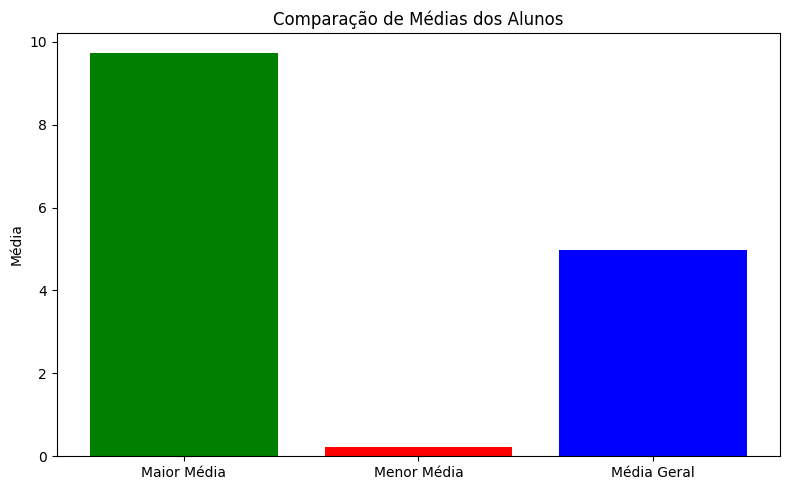

In [38]:
#Gráfico comparando a média dos alunos

medias = {
    'Maior Média': maior_media,
    'Menor Média': menor_media,
    'Média Geral': media_geral
}

plt.figure(figsize=(8, 5))
plt.bar(medias.keys(), medias.values(), color=['green', 'red', 'blue'])
plt.ylabel('Média')
plt.title('Comparação de Médias dos Alunos')
plt.tight_layout()

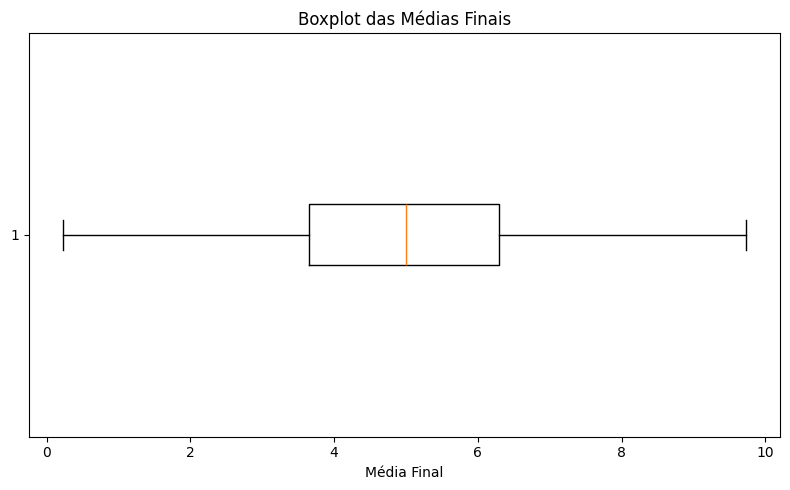

In [41]:
#Um gráfico do tipo Boxplot para determinar se está tendo algum Outlier e a representação dos Quartis

plt.figure(figsize=(8, 5))
plt.boxplot(df['Média Final'].dropna(), vert=False)
plt.xlabel('Média Final')
plt.title('Boxplot das Médias Finais')
plt.tight_layout()
plt.show()